# Deutsch-Jozsa算法

In [4]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
from math import sqrt,pi

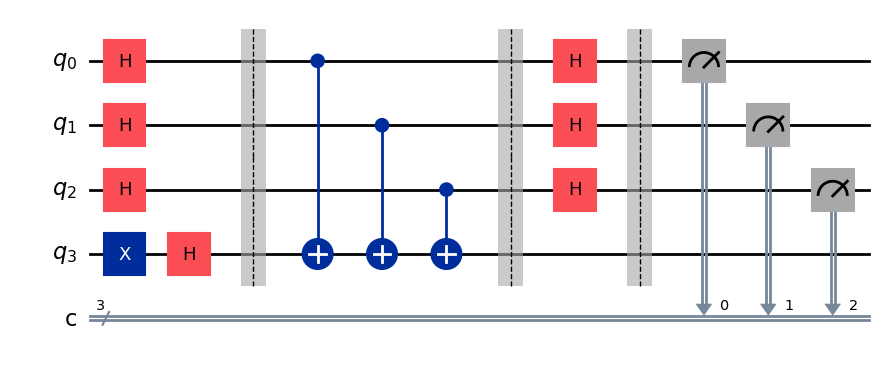

In [5]:
n=3
dj_circuit=QuantumCircuit(n+1,n)

for qubit in range(n):
    dj_circuit.h(qubit)

dj_circuit.x(n)
dj_circuit.h(n)
dj_circuit.barrier()

balanced_oracle=QuantumCircuit(n+1,name='balanced_oracle')
for i in range(n):
    balanced_oracle.cx(i,n)
dj_circuit=dj_circuit.compose(balanced_oracle)
dj_circuit.barrier()

for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

for i in range(n):
    dj_circuit.measure(i,i)

dj_circuit.draw('mpl')


仿真测量结果统计:
{'111': 1024}


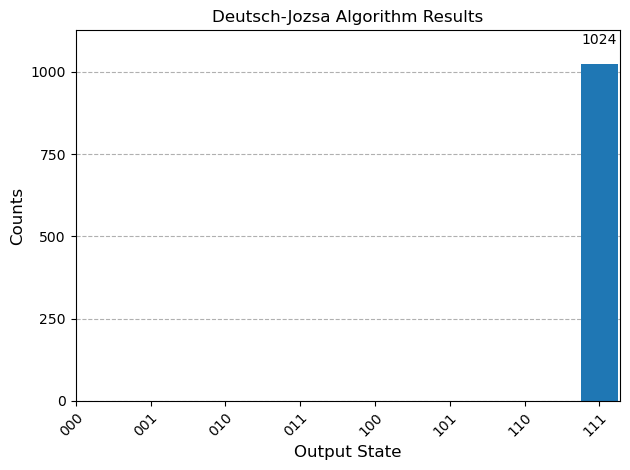

In [6]:
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from qiskit_aer import AerSimulator

# 您的电路执行代码
simulator = AerSimulator()
job = simulator.run(dj_circuit, shots=1024)
result = job.result()
counts = result.get_counts(dj_circuit)

print("\n仿真测量结果统计:")
print(counts)

# 1. 预设所有可能的状态标签
n = dj_circuit.num_qubits - 1  # 假设您的DJ电路有n+1个量子比特，前n个为输入寄存器
all_possible_outcomes = [format(i, '0'+str(n)+'b') for i in range(2**n)]

# 2. 创建一个包含所有状态的新字典，未出现的状态计数为0
complete_counts = {key: counts.get(key, 0) for key in all_possible_outcomes}

# 3. 绘制完整的统计直方图，并自定义样式
fig, ax = plt.subplots()  # 创建图形和轴对象，便于更精细的自定义

# 使用plot_histogram绘图，并通过ax参数关联到创建的轴对象，同时设置一些样式
plot_histogram(complete_counts,
               title='Deutsch-Jozsa Algorithm Results',
               ax=ax,  # 关联到创建的轴对象
               bar_labels=True,  # 显示条形图上的数值标签
               color=['#1f77b4' if complete_counts[key] == 0 else '#ff7f0e' for key in all_possible_outcomes],  # 为出现的状态设置不同颜色
               figsize=(10, 6)  # 调整图形大小
              )

# 进一步自定义图表样式
ax.set_xlabel("Output State", fontsize=12)  # 设置X轴标签
ax.set_ylabel("Counts", fontsize=12)  # 设置Y轴标签
plt.xticks(rotation=45)  # 如果状态名较长，可以旋转X轴标签防止重叠
plt.tight_layout()  # 自动调整布局
plt.show()